In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()


In [3]:
dataset = pd.read_csv("japan_used_cars_datasets.csv")
dataset.head(5)


,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


The car features are names of the car, price of the car, production year, miles travelled, engine and transmission types

In [12]:
#get the shape of the data
dataset.shape

(2318, 11)

In [14]:
#get the statistical description of the float columns
dataset.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [16]:
dataset.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

There are no missing values That is a very small number so we need to check the column to see how we can clean it

In [17]:
dataset.shape

(2318, 11)

NAME
We will extract the name of the car manufacturers from the name column



In [20]:
dataset['manufacturer'] = dataset['mark'].apply(lambda x: x.split(' ')[0])
dataset['manufacturer'].head()

0      nissan
1      nissan
2      nissan
3      toyota
4    daihatsu
Name: manufacturer, dtype: object

In [21]:
dataset.manufacturer.nunique()

28

In [22]:
dataset.manufacturer.unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land', 'peugeot',
       'hyundai', 'kia', 'audi', 'citroen', 'mitsuoka', 'volvo', 'ford',
       'hino', 'jaguar'], dtype=object)

We will clean these data by making similar maufacturers uniform.

In [23]:
print(dataset.manufacturer.unique())
print('\n')
print('There are ' + str(dataset.manufacturer.nunique()) + ' different car manufacturers in the dataset')


['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land' 'peugeot' 'hyundai' 'kia' 'audi' 'citroen'
 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']


There are 28 different car manufacturers in the dataset


# price

In [25]:
#dataset['price'] = dataset['price'].str.replace(',', '').str.replace('', '£').astype(np.int64)
dataset['price'].head()

0     80
1    110
2    165
3    190
4    190
Name: price, dtype: int64

YEAR
We can't work with the year column like that, we have to convert it to age so that it will be easy to understand

In [26]:
#convert the year column to integer
dataset['year']=dataset['year'].astype(str).astype(np.int64)

In [27]:
Current_Year = 2022

In [28]:
dataset['age'] = Current_Year - dataset['year']

In [29]:
dataset['age'] = dataset['age'].astype(np.int64)

In [30]:
dataset['age'].head()

0    19
1    12
2    17
3    14
4    16
Name: age, dtype: int64

MILEAGE
Remove the commas and miles from the mileage column

In [33]:

dataset['mileage'].head()


0     80000
1     53000
2     47690
3    130661
4     66300
Name: mileage, dtype: int64

In [37]:
dataset['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [36]:
dataset['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [39]:
dataset = dataset[['mark', 'manufacturer', 'year', 'age', 'mileage', 'fuel', 'transmission', 'price']]
dataset.head()


,mark,manufacturer,year,age,mileage,fuel,transmission,price
0,nissan,nissan,2003,19,80000,gasoline,at,80
1,nissan,nissan,2010,12,53000,gasoline,at,110
2,nissan,nissan,2005,17,47690,gasoline,at,165
3,toyota,toyota,2008,14,130661,gasoline,at,190
4,daihatsu,daihatsu,2006,16,66300,gasoline,at,190


In [40]:
dataset.shape

(2318, 8)

In [41]:
#save the cleaned data to a csv file

#data.to_csv('cleaned_car_data.csv', index = False)


In [42]:
dataset.head()

,mark,manufacturer,year,age,mileage,fuel,transmission,price
0,nissan,nissan,2003,19,80000,gasoline,at,80
1,nissan,nissan,2010,12,53000,gasoline,at,110
2,nissan,nissan,2005,17,47690,gasoline,at,165
3,toyota,toyota,2008,14,130661,gasoline,at,190
4,daihatsu,daihatsu,2006,16,66300,gasoline,at,190


DATA ANALYSIS

In [43]:
#the most expensive cars in the collection
dataset.nlargest(5, 'price')

,mark,manufacturer,year,age,mileage,fuel,transmission,price
2293,toyota,toyota,2005,17,85674,gasoline,at,1400
2294,toyota,toyota,2005,17,138082,gasoline,at,1400
2295,toyota,toyota,2005,17,104593,gasoline,at,1400
2296,toyota,toyota,2005,17,45939,gasoline,at,1400
2297,nissan,nissan,2006,16,147875,gasoline,at,1400


In [44]:
#cars with the most miles in the collection
dataset.nlargest(5, 'mileage')

,mark,manufacturer,year,age,mileage,fuel,transmission,price
811,mazda,mazda,2009,13,790000,gasoline,at,850
1713,honda,honda,2011,11,623765,gasoline,at,1213
1587,toyota,toyota,2010,12,600000,gasoline,at,1165
2210,hino,hino,2006,16,567058,diesel,mt,1372
971,toyota,toyota,2003,19,497408,lpg,at,933


In [45]:
#oldest cars in the collection
dataset.nlargest(5, 'age')

,mark,manufacturer,year,age,mileage,fuel,transmission,price
23,kubota,kubota,1979,43,9999,diesel,mt,300
249,mitsubishi,mitsubishi,1982,40,58099,gasoline,mt,551
1128,suzuki,suzuki,1987,35,17800,gasoline,mt,990
1160,mazda,mazda,1988,34,137419,gasoline,mt,1000
740,suzuki,suzuki,1990,32,55189,gasoline,mt,840


In [46]:
dataset.head()


,mark,manufacturer,year,age,mileage,fuel,transmission,price
0,nissan,nissan,2003,19,80000,gasoline,at,80
1,nissan,nissan,2010,12,53000,gasoline,at,110
2,nissan,nissan,2005,17,47690,gasoline,at,165
3,toyota,toyota,2008,14,130661,gasoline,at,190
4,daihatsu,daihatsu,2006,16,66300,gasoline,at,190


In [47]:
corr = dataset.corr()
corr

,year,age,mileage,price
year,1.000000,-1.000000,0.086065,-0.211092
age,-1.000000,1.000000,-0.086065,0.211092
mileage,0.086065,-0.086065,1.000000,0.021581
price,-0.211092,0.211092,0.021581,1.000000


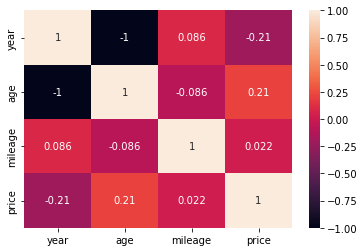

In [48]:
# heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True);


C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


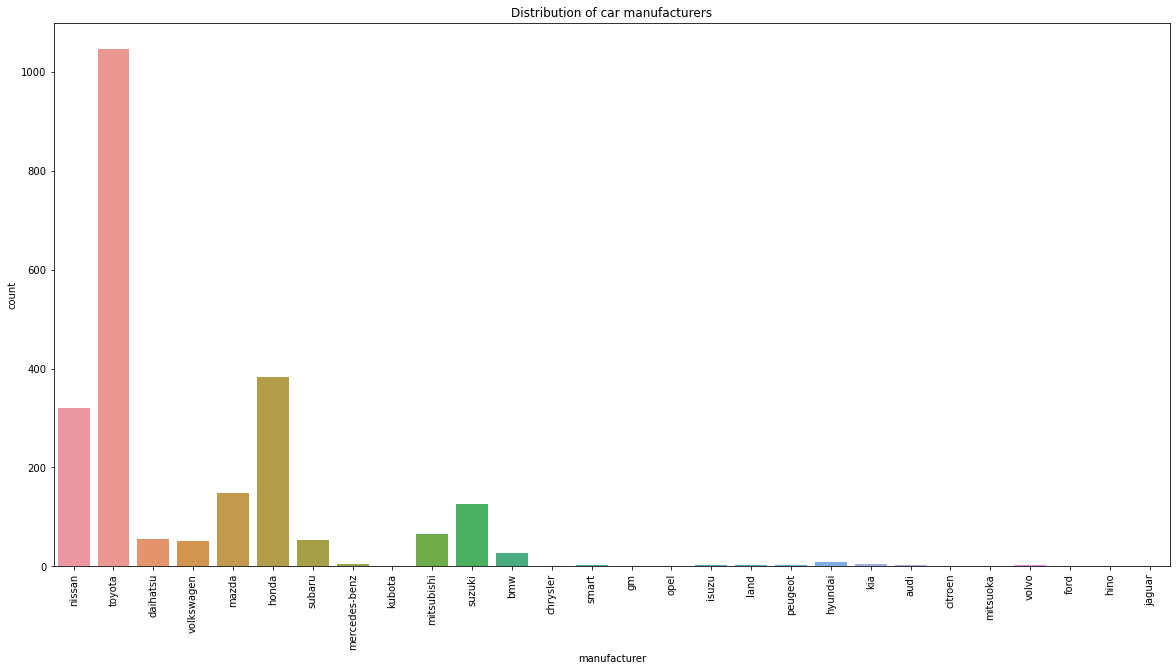

In [49]:
# count of cars by car make
fig = plt.figure(figsize=(20, 10))
sns.countplot(dataset.manufacturer);
plt.title("Distribution of car manufacturers")
plt.xticks(rotation=90)
plt.savefig('distribution-of-car-manufacturers.png')

In [50]:
# numbers of cars under the various car manufacturers
dataset.manufacturer.value_counts()


toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia                 4
isuzu               3
audi                3
smart               2
volvo               2
land                2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: manufacturer, dtype: int64

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


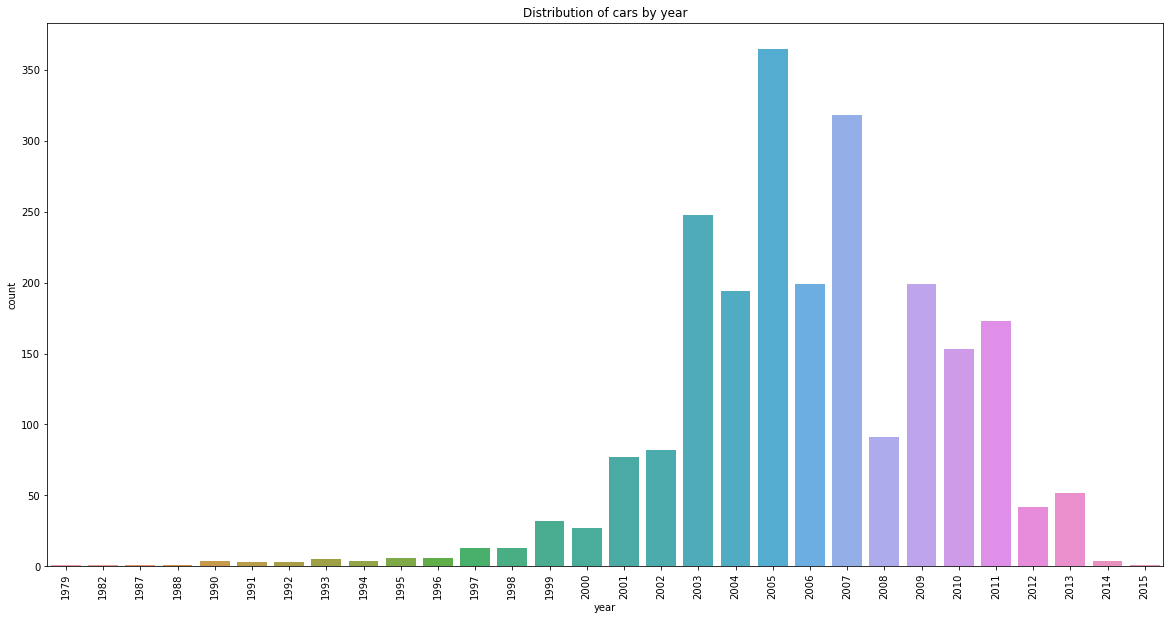

In [53]:
#count of cars by year
fig = plt.figure(figsize=(20,10))
sns.countplot(dataset.year)
plt.title("Distribution of cars by year")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-by-year.png')


Text(0.5, 1.0, 'Distribution of `the years')

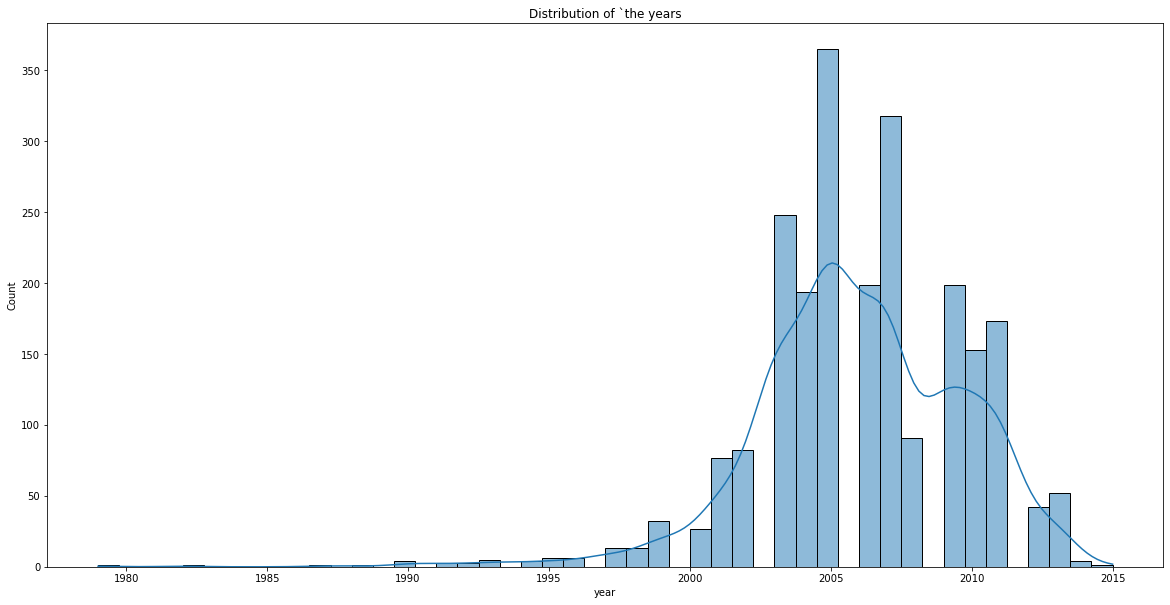

In [56]:
# distribution of the year column
fig = plt.figure(figsize=(20,10))
sns.histplot(data = dataset, x = 'year', kde = True)
plt.title("Distribution of `the years")

In [57]:
# numbers of cars produced in each year
dataset.year.value_counts()

2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: year, dtype: int64

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


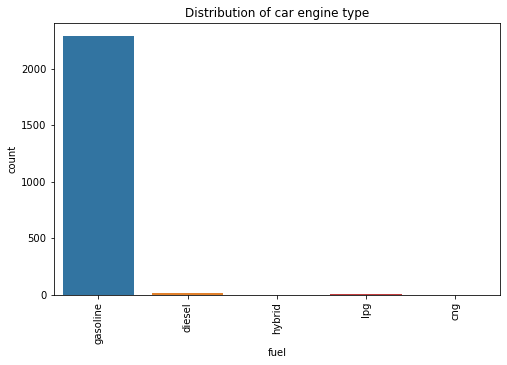

In [60]:
#count of cars by engine
fig = plt.figure(figsize=(8, 5))
sns.countplot(dataset.fuel);
plt.title("Distribution of car engine type")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-engine-type.png')

In [61]:
# numbers of cars with the different engine types
dataset.fuel.value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


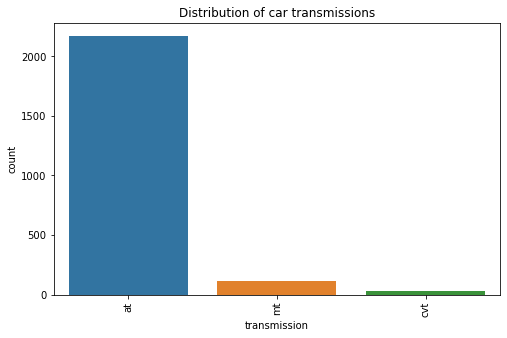

In [62]:
#count of cars by transmission
fig = plt.figure(figsize=(8, 5))
sns.countplot(dataset.transmission);
plt.title("Distribution of car transmissions")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-transmission.png')


In [63]:
# number of cars with the various car transmissions 
dataset.transmission.value_counts()

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

In [65]:
# create a pivot table to find the average price per car manufacturer
pivot_table = dataset.pivot_table(values='price', index='manufacturer', aggfunc='mean')
result = pivot_table.sort_values('price', ascending = False)
result


,price
manufacturer,
jaguar,1385.000000
hino,1372.000000
ford,1350.000000
hyundai,1305.000000
volvo,1262.500000
kia,1185.500000
bmw,1184.666667
isuzu,1174.000000
mitsuoka,1120.000000


<AxesSubplot:xlabel='age', ylabel='price'>

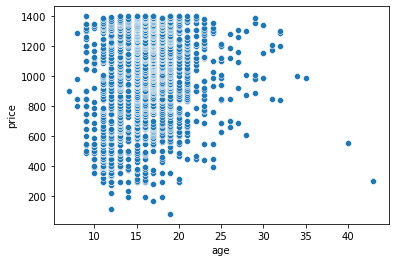

In [67]:
sns.scatterplot(x='age', y='price', data=dataset)

There is negative correlation between the age and prices of cars. As the age increases, the price reduces

<AxesSubplot:xlabel='mileage', ylabel='price'>

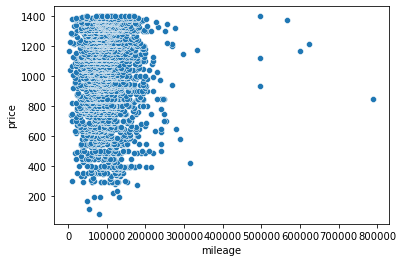

In [68]:
sns.scatterplot(x='mileage', y='price', data=dataset)

There is negative correlation between the mileage and prices of the cars. As the number of miles travelled increases, the price reduces

<AxesSubplot:xlabel='mileage', ylabel='price'>

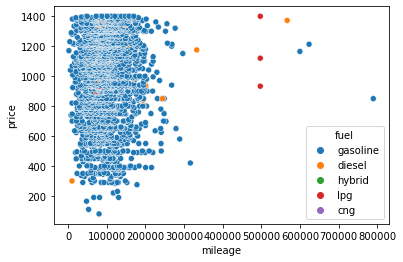

In [71]:
sns.scatterplot(x='mileage', y='price', data=dataset, hue = 'fuel')

<AxesSubplot:xlabel='age', ylabel='mileage'>

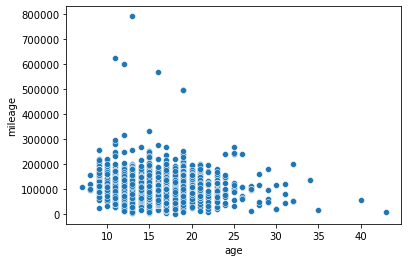

In [72]:
sns.scatterplot(x='age', y='mileage', data=dataset)

There is a positive correlation between the mileage and age of the cars. the number of miles travelled increases with age.

<AxesSubplot:xlabel='age', ylabel='mileage'>

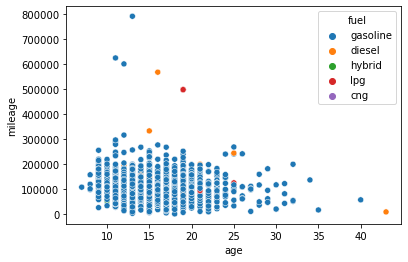

In [74]:
sns.scatterplot(x='age', y='mileage', data=dataset, hue = 'fuel')

Text(0.5, 1.0, 'Box Plot of Age')

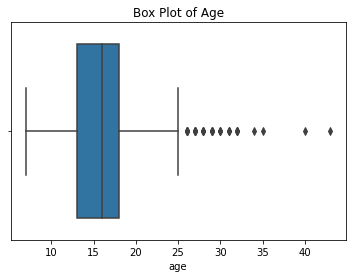

In [75]:
sns.boxplot(x='age', data = dataset)
plt.title("Box Plot of Age")

NameError: name 'transmission' is not defined

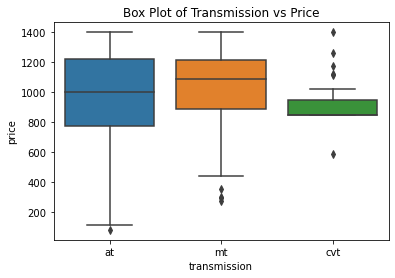

In [115]:
sns.boxplot(x="transmission", y="price", data=dataset)
plt.title("Box Plot of Transmission vs Price")
print("x ->",transmission.shape)
print("y ->",price.shape)



Text(0.5, 1.0, 'Box Plot of Engine vs Price')

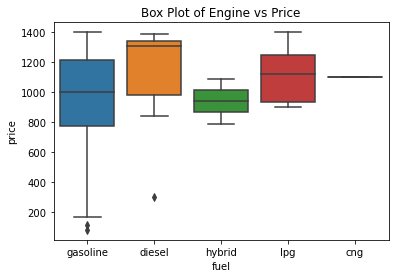

In [78]:
sns.boxplot(x="fuel", y="price", data=dataset)
plt.title("Box Plot of Engine vs Price")

In [80]:
dataset.head()

,mark,manufacturer,year,age,mileage,fuel,transmission,price
0,nissan,nissan,2003,19,80000,gasoline,at,80
1,nissan,nissan,2010,12,53000,gasoline,at,110
2,nissan,nissan,2005,17,47690,gasoline,at,165
3,toyota,toyota,2008,14,130661,gasoline,at,190
4,daihatsu,daihatsu,2006,16,66300,gasoline,at,190


In [86]:
#drop the name and year columns because it is irrelevant in our model building
data = dataset.drop(['manufacturer', 'year'], axis=1)

In [95]:
dataset.head()

,mark,manufacturer,year,age,mileage,fuel,transmission,price
0,nissan,nissan,2003,19,80000,gasoline,at,80
1,nissan,nissan,2010,12,53000,gasoline,at,110
2,nissan,nissan,2005,17,47690,gasoline,at,165
3,toyota,toyota,2008,14,130661,gasoline,at,190
4,daihatsu,daihatsu,2006,16,66300,gasoline,at,190


In [96]:
dataset['manufacturer'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land', 'peugeot',
       'hyundai', 'kia', 'audi', 'citroen', 'mitsuoka', 'volvo', 'ford',
       'hino', 'jaguar'], dtype=object)

In [129]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3) 
print("x_train->",x_train.shape)
print("x_test->",x_test.shape)

NameError: name 'x_train' is not defined

In [ ]:
reg.predict(xtest) 

In [ ]:
ytest

In [ ]:

reg.score(xtest,ytest)

In [126]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [118]:
# creating X and y variables
X = data.drop('price', axis=1)

# log transform the price column
y = np.log(data['price'])


In [119]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#print("x_train->",x_train.shape)
#print("x_test->",x_test.shape)

NameError: name 'x_train' is not defined

In [124]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined